In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset preprocessing

## Visualizing dataset

In [204]:
df = pd.read_csv('./Dataset/1_record_2.csv')
df[[df.columns[i] for i in range(len(df.columns)-1)]].head()

,ID Cleint,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,DriverCount,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Arr,16,19,24,43,45,55,62,70,79,...,357,357,371,385,415,439,440,441,441,459
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Lodind dataset

In [205]:
df = pd.read_csv('./Dataset/1_record_2.csv')
df = df.sample(n=df.shape[0])
X  = df.T[[i for i in range(102)]][1:df.shape[1]-1].to_numpy()
y  = df.T[102][1:df.shape[1]-1].to_numpy()

In [206]:
for i in range(1,201):
    for k in range(5):
        df = pd.read_csv('./Dataset/'+str(i + 200*k)+'_record_2.csv')
        df = df.sample(n=df.shape[0])
        X  = np.append(X, df.T[[i for i in range(102)]][1:df.shape[1]-1].to_numpy(), axis = 0)
        y  = np.append(y, df.T[102][1:df.shape[1]-1].to_numpy())

In [207]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.int32)

In [208]:
X.shape

(37306, 102)

In [209]:
y.shape

(37306,)

## Splitting dataset into training and testing dataset

#### We take 70% for training and 30% for testing

In [210]:
percent = 0.80

In [211]:
X_train, X_test = X[0:int(X.shape[0]*percent)], X[int(X.shape[0]*percent):X.shape[0]]
y_train, y_test = y[0:int(y.shape[0]*percent)], y[int(X.shape[0]*percent):y.shape[0]]

# Classification Task

In this part we try to classify our dataset using several classification models, we will use in the first SVM (Support Vector Machine), in a second step we will use a deep learning model of the Tensorflow framework and finally we will use our deep learning model that we built from scratch.

## 1- SVM model

In [106]:
from sklearn import svm, metrics

### Fitting the model in the training dataset

In [213]:
clf = svm.SVC()
clf.fit(X_train, y_train)

### Testing the model in the testing dataset

In [108]:
predicted = clf.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1614
           1       0.78      1.00      0.88      5848

    accuracy                           0.78      7462
   macro avg       0.39      0.50      0.44      7462
weighted avg       0.61      0.78      0.69      7462




/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpretation
  We can see that the precision, recall and f1 score for class 1 are very strong and for class 0 are very low. This is due to the significant lack of data for class 0.

# 2- Deep learning of Tensorflow model

## Import dependencies for the Tensorflow Deep Learning

In [214]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Building an Artificial Neural network

#### Defining the model

In [215]:
model = tf.keras.models.Sequential()

#### Adding the first layer (Dense layer)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (100, )

In [216]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(102, )))

#### Adding a Dropout layer 

In [217]:
model.add(tf.keras.layers.Dropout(0.2))

#### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

In [218]:
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

#### Comiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [219]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [220]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               13184     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 13,442
Trainable params: 13,442
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [221]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
933/933 [==============================] - 3s 3ms/step - loss: 1.3041 - sparse_categorical_accuracy: 0.7455
Epoch 2/20
933/933 [==============================] - 3s 3ms/step - loss: 0.4025 - sparse_categorical_accuracy: 0.8140
Epoch 3/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3727 - sparse_categorical_accuracy: 0.8311
Epoch 4/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3626 - sparse_categorical_accuracy: 0.8355
Epoch 5/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3460 - sparse_categorical_accuracy: 0.8444
Epoch 6/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3365 - sparse_categorical_accuracy: 0.8490
Epoch 7/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3315 - sparse_categorical_accuracy: 0.8537
Epoch 8/20
933/933 [==============================] - 3s 3ms/step - loss: 0.3222 - sparse_categorical_accuracy: 0.8594
Epoch 9/20
933/933 [============================

#### Model evaluation and prediction

In [222]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

234/234 [==============================] - 1s 2ms/step - loss: 0.3223 - sparse_categorical_accuracy: 0.8618


In [223]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8618332743644714


In [224]:
X_test[0].T.shape

(102,)

In [225]:
X_test.shape

(7462, 102)

In [226]:
list_y_0 = np.where(y_test == 0)[0].tolist()

In [227]:
count = 0

In [228]:
for index in list_y_0:
    if model.predict(X_test[index].reshape(X_test[index].shape[0],1).T)[0][0] >= 0.5:
        count += 1
count

1008

In [229]:
count/1614*100

62.45353159851301

# 3- Our Deep Learning Model

## Import dependencies of our model

In [230]:
from IIA import DeepNeuralNets

## Building an Artificial Neural network

### Initialization of the dimension of the layers of the deep neural networks

In [234]:
m   = 102  # couche d'entrer
n_1 = 40  # couche 1
n_2 = 20  # couche 2
n_3 = 1    # couche de sortie
layers_dims = [m, n_1, n_2, n_3]

### Declaration of the DeepNeuralNets class

In [237]:
DNN = DeepNeuralNets(
    X_train.T, 
    y_train.reshape(y_train.shape[0],1).T, 
    layers_dims, 
    learning_rate = 0.001, 
    num_iterations = 5000, 
    initialization = "random", 
    optimizer="gd", 
    print_cost=True,
    nbr_print = 100
)

### Fitting the model on the training dataset

Cost after iteration 0: 0.719005
Cost after iteration 100: 0.569212
Cost after iteration 200: 0.566637
Cost after iteration 300: 0.565676
Cost after iteration 400: 0.564727
Cost after iteration 500: 0.563785
Cost after iteration 600: 0.562846
Cost after iteration 700: 0.561908
Cost after iteration 800: 0.560971
Cost after iteration 900: 0.560032
Cost after iteration 1000: 0.559090
Cost after iteration 1100: 0.558142
Cost after iteration 1200: 0.557188
Cost after iteration 1300: 0.556225
Cost after iteration 1400: 0.555252
Cost after iteration 1500: 0.554266
Cost after iteration 1600: 0.553267
Cost after iteration 1700: 0.552252
Cost after iteration 1800: 0.551219
Cost after iteration 1900: 0.550165
Cost after iteration 2000: 0.549085
Cost after iteration 2100: 0.547948
Cost after iteration 2200: 0.546768
Cost after iteration 2300: 0.545616
Cost after iteration 2400: 0.544436
Cost after iteration 2500: 0.543229
Cost after iteration 2600: 0.541990
Cost after iteration 2700: 0.540719
Cost

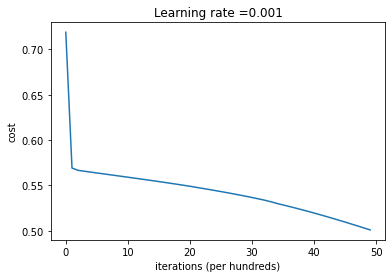

In [239]:
parameters = DNN.fit()

### Testing and validation of our model

In [240]:
predicted = DNN.predict(X_test.T, parameters)
print(f"{metrics.classification_report(y_test.reshape(y_test.shape[0],1), predicted)}\n")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1614
           1       0.78      1.00      0.88      5848

    accuracy                           0.78      7462
   macro avg       0.39      0.50      0.44      7462
weighted avg       0.61      0.78      0.69      7462




/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/imrane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
